# TP n°1: Simulation de la fermentation alcoolique

## Simulation de la fermentation en batch

voici un code permettant de simuler le modèle de fermentation en batch ($Q_{in}=0$) et de comparer les sorties du modèles avec des données expérimentales qui sont stockées dans le fichier batch.txt

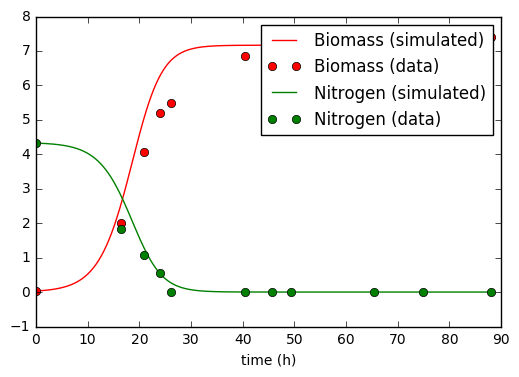

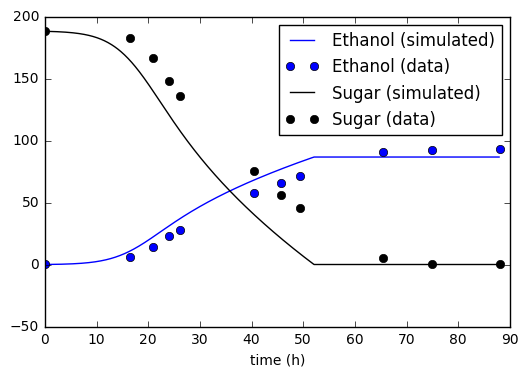

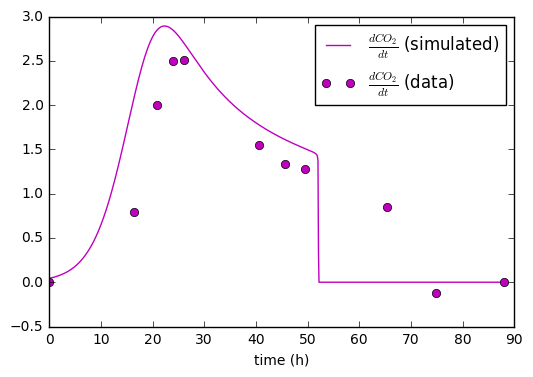

In [1]:

import numpy as np # numpy: vector, matrices ...
import matplotlib.pyplot as plt # matplotlib: for graphics
import scipy.integrate as scint

plt.close('all') # close all figure

# model of the the fermenter
def fermenter(x,t,k1,k2,mu1max,mu2max,KN,KE,KS):
    B = x[0] # biomass
    N = x[1] # nitrogen
    E = x[2] # ethanol
    S = x[3] # sugar
    
    dx = np.zeros(4) #derivative of B, N, E and S
    mu1 = mu1max*N/(KN+N)
    mu2 = mu2max*S/(KS+S)*KE/(KE+E)
    dx[0] = mu1*B
    dx[1] = -k1*mu1*B
    dx[2] = mu2*B
    dx[3] = -k2*mu2*B
    return dx
    
# parameter of the model
k1 = 0.0606 # -
k2 = 2.17 # -
mu1max = 1.34 # 1/h
mu2max = 1.45 # 1/h
KN = 1.57 # g/L
KE = 14.1 # g/L
KS = 0.0154 # g/L

Data = np.loadtxt('data/batch.txt')
Datatime = Data[:,0] #time
DataB2 = Data[:,1] # biomass in 10^6 cell/mL
DataB = Data[:,6] # biomass in g/L
DataN = Data[:,2]/1000 # nitrogen
DataE = Data[:,3] # ethanol
DataS = Data[:,4] # sugar
DataCO2 = Data[:,5]/100 # CO2 production rate

t0 = Datatime[0]  # initial time
tf = Datatime[-1]  # final time

# initial conditions
x0 = np.array([DataB[0], DataN[0], 0, DataS[0]])

# time vector
t = np.arange(t0,tf,0.1)

# integration numerique de l'EDO
y = scint.odeint(fermenter,x0,t,args=(k1,k2,mu1max,mu2max,KN,KE,KS))

plt.figure(1)
plt.plot(t,y[:,0],'r',label='Biomass (simulated)')
plt.plot(Datatime,DataB,'ro',label='Biomass (data)')
plt.plot(t,y[:,1]*10,'g',label='Nitrogen (simulated)')
plt.plot(Datatime,DataN*10,'go',label='Nitrogen (data)')
plt.legend()
plt.xlabel('time (h)')

plt.figure(2)
plt.plot(t,y[:,2],'b',label='Ethanol (simulated)')
plt.plot(Datatime,DataE,'bo',label='Ethanol (data)')
plt.plot(t,y[:,3],'k',label='Sugar (simulated)')
plt.plot(Datatime,DataS,'ko',label='Sugar (data)')
plt.legend()
plt.xlabel('time (h)')

plt.figure(3)
plt.plot(t,mu2max*y[:,3]/(KS+y[:,3])*KE/(KE+y[:,2])*y[:,0],'m',label=r'$\frac{dCO_2}{dt}$ (simulated)')
plt.plot(Datatime,DataCO2,'mo',label=r'$\frac{dCO_2}{dt}$ (data)')
plt.legend()
plt.xlabel('time (h)')

plt.show()